<table style="float: left; width: 50%;">
    <thead>
        <tr>
            <th style="background-color: #ADD8E6; color: black; text-align: left; padding: 8px;">NIM</th>
            <th style="background-color: #ADD8E6; color: black; text-align: left; padding: 8px;">Nama</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: left; padding: 8px;">12S19036</td>
            <td style="text-align: left; padding: 8px;">Lucas Hutabarat</td>
        </tr>
        <tr>
            <td style="text-align: left; padding: 8px;">12S21004</td>
            <td style="text-align: left; padding: 8px;">Estomihi Pangaribuan</td>
        </tr>
        <tr>
            <td style="text-align: left; padding: 8px;">12S21014</td>
            <td style="text-align: left; padding: 8px;">Fritz Kevin Manurung</td>
        </tr>
    </tbody>
</table>

# 1. Import Library dan Load Dataset

In [33]:
!gdown 1ZxmN_8QNbzZ2S_aCrIPBV1nQnpQIXTTV

Downloading...
From: https://drive.google.com/uc?id=1ZxmN_8QNbzZ2S_aCrIPBV1nQnpQIXTTV
To: /content/Tempat-Wisata-Toba-Preprocessing.csv
100% 8.99M/8.99M [00:00<00:00, 87.5MB/s]


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

file_path = 'Tempat-Wisata-Toba-Preprocessing.csv'
data = pd.read_csv(file_path)

In [35]:
print(data.shape)
print(data.columns)

(43226, 9)
Index(['Unnamed: 0.1', 'Unnamed: 0', 'address', 'PlaceID',
       'Nama_tempat_wisata', 'Category', 'ReviewerId', 'Rating', 'Reviews'],
      dtype='object')


In [36]:
data.rename(columns={
    'Unnamed: 0.1': 'Index_1',
    'Unnamed: 0': 'Index_2',
    'address': 'Alamat',
    'PlaceID': 'ID_Tempat',
    'Nama_tempat_wisata': 'Nama_Tempat_Wisata',
    'Category': 'Kategori',
    'ReviewerId': 'ID_Reviewer',
    'Rating': 'Penilaian',
    'Reviews': 'Ulasan'
}, inplace=True)

In [37]:
data['Penilaian'] = data['Penilaian'].astype(float)

In [38]:
data.dropna(inplace=True)

In [39]:
data.head()

,Index_1,Index_2,Alamat,ID_Tempat,Nama_Tempat_Wisata,Kategori,ID_Reviewer,Penilaian,Ulasan
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k
6,6,6,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.142390e+20,5.0,amazing pengen kesini lagi
8,8,8,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.047430e+20,3.0,jalan menuju lokasi perlu diperhatikan oleh pe...


In [40]:
data.drop(columns=['Index_1', 'Index_2', 'Alamat', 'Ulasan'], inplace=True)

In [41]:
print(data.head())

   ID_Tempat         Nama_Tempat_Wisata       Kategori   ID_Reviewer  \
1          0  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.119090e+20   
3          0  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.130720e+20   
4          0  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.061730e+20   
6          0  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.142390e+20   
8          0  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.047430e+20   

   Penilaian  
1        5.0  
3        5.0  
4        5.0  
6        5.0  
8        3.0  


# Data Splitting

Data dibagi menjadi tiga yaitu train(70%), val(15%) dan test(15%)

In [42]:
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [43]:
print("Train size:", train_data.shape)
print("Validation size:", val_data.shape)
print("Test size:", test_data.shape)

Train size: (15516, 5)
Validation size: (3325, 5)
Test size: (3325, 5)


In [44]:
train_data.head()

,ID_Tempat,Nama_Tempat_Wisata,Kategori,ID_Reviewer,Penilaian
285,0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.067710e+20,5.0
33728,94,Menara Pandang Tele,Wisata Alam,1.129560e+20,5.0
30331,91,Bukit Holbung Samosir,Wisata Alam,1.003220e+20,5.0
31045,92,Geosite Sipinsur,Wisata Alam,1.091150e+20,4.0
20579,68,Batu Kursi Raja Siallagan ( Stone Chair of Kin...,Wisata Budaya,1.118680e+20,5.0


In [45]:
val_data.head()

,ID_Tempat,Nama_Tempat_Wisata,Kategori,ID_Reviewer,Penilaian
19330,66,The Kaldera,Wisata Alam,1.041270e+20,5.0
39661,99,Pertunjukan Tari Sigale Gale,Wisata Budaya,1.069140e+20,5.0
24471,80,Wisata Bukit Gibeon,Wisata Alam,1.165750e+20,4.0
19710,67,Pantai Indah Situngkir (PIS),Wisata Bahari,1.169200e+20,5.0
33203,94,Menara Pandang Tele,Wisata Alam,1.081560e+20,5.0


In [46]:
test_data.head()

,ID_Tempat,Nama_Tempat_Wisata,Kategori,ID_Reviewer,Penilaian
23696,78,Pakkodian Toba,Wisata Bahari,1.026420e+20,3.0
35738,96,Museum Batak Tb Silalahi Center,Wisata Budaya,1.052260e+20,4.0
26124,86,"Kebun Raya Samosir, SUMUT",Wisata Pertanian,1.051080e+20,5.0
34556,95,Pantai Pasir Putih Parbaba,Wisata Bahari,1.142240e+20,4.0
21717,75,Air Terjun Siboruon,Wisata Alam,1.017030e+20,5.0


# Create User-Item Matrix

In [47]:
def create_user_item_matrix(data, user_col='ID_Reviewer', item_col='Nama_Tempat_Wisata', rating_col='Penilaian'):
    data = data.groupby([user_col, item_col])[rating_col].mean().reset_index()
    user_item_matrix = data.pivot_table(
        index=user_col,
        columns=item_col,
        values=rating_col,
        fill_value=0
    )
    return user_item_matrix

In [48]:
train_matrix = create_user_item_matrix(train_data)

val_matrix = create_user_item_matrix(val_data)
val_matrix = val_matrix.reindex(columns=train_matrix.columns, fill_value=0)

test_matrix = create_user_item_matrix(test_data)
test_matrix = test_matrix.reindex(columns=train_matrix.columns, fill_value=0)

In [49]:
print("Train Matrix shape:", train_matrix.shape)
print("Validation Matrix shape:", val_matrix.shape)
print("Test Matrix shape:", test_matrix.shape)

Train Matrix shape: (8888, 101)
Validation Matrix shape: (2846, 101)
Test Matrix shape: (2814, 101)


In [50]:
train_matrix.head()

Nama_Tempat_Wisata,Aek Rangat Pangururan,Aek Sipangolu Bakkara,Air Terjun Efrata,Air Terjun Janji,Air Terjun Pandumaan,Air Terjun Sampuran,Air Terjun Siboruon,Air Terjun Situmurun,Air Terjun Taman Eden 100,Air Terjun Tombak Pangaribuan,...,Tarabunga,Tempat Pengasingan Soekarno,The Kaldera,Tombak Sulusulu,Tugu D.I PANJAITAN,Tugu Toga Aritonang,WF Coffee&Resto,Wisata Alam Ajibata,Wisata Bukit Gibeon,Wisata Rumah Pohon
ID_Reviewer,,,,,,,,,,,,,,,,,,,,,
1.000030e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000040e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000090e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000100e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000120e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
val_matrix.head()

Nama_Tempat_Wisata,Aek Rangat Pangururan,Aek Sipangolu Bakkara,Air Terjun Efrata,Air Terjun Janji,Air Terjun Pandumaan,Air Terjun Sampuran,Air Terjun Siboruon,Air Terjun Situmurun,Air Terjun Taman Eden 100,Air Terjun Tombak Pangaribuan,...,Tarabunga,Tempat Pengasingan Soekarno,The Kaldera,Tombak Sulusulu,Tugu D.I PANJAITAN,Tugu Toga Aritonang,WF Coffee&Resto,Wisata Alam Ajibata,Wisata Bukit Gibeon,Wisata Rumah Pohon
ID_Reviewer,,,,,,,,,,,,,,,,,,,,,
1.000100e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1.000160e+20,0.0,0.0,0.0,5.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1.000270e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1.000280e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1.000380e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [52]:
test_matrix.head()

Nama_Tempat_Wisata,Aek Rangat Pangururan,Aek Sipangolu Bakkara,Air Terjun Efrata,Air Terjun Janji,Air Terjun Pandumaan,Air Terjun Sampuran,Air Terjun Siboruon,Air Terjun Situmurun,Air Terjun Taman Eden 100,Air Terjun Tombak Pangaribuan,...,Tarabunga,Tempat Pengasingan Soekarno,The Kaldera,Tombak Sulusulu,Tugu D.I PANJAITAN,Tugu Toga Aritonang,WF Coffee&Resto,Wisata Alam Ajibata,Wisata Bukit Gibeon,Wisata Rumah Pohon
ID_Reviewer,,,,,,,,,,,,,,,,,,,,,
1.000120e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000300e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000340e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000370e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000380e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# RMSE, MAE, MAP, Precision, & Recall

In [53]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [54]:
def compute_rmse(true_matrix, approx_matrix):
    return np.sqrt(mean_squared_error(true_matrix.values.ravel(), approx_matrix.ravel()))

In [55]:
def compute_mae(true_matrix, approx_matrix):
    return mean_absolute_error(true_matrix.values.ravel(), approx_matrix.ravel())

In [56]:
def precision_at_k(true_matrix, approx_matrix, k=10):
    def calculate_precision(i):
        true_ratings = true_matrix.values[i]
        approx_ratings = approx_matrix[i]
        top_k_indices = np.argsort(approx_ratings)[::-1][:k]
        relevant_items = np.sum(true_ratings[top_k_indices] > 0)
        return relevant_items / k

    precision_scores = np.vectorize(calculate_precision)(np.arange(true_matrix.shape[0]))
    return np.mean(precision_scores)

In [57]:
def recall_at_k(true_matrix, approx_matrix, k=10):
    def calculate_recall(i):
        true_ratings = true_matrix.values[i]
        approx_ratings = approx_matrix[i]
        top_k_indices = np.argsort(approx_ratings)[::-1][:k]
        relevant_items = np.sum(true_ratings[top_k_indices] > 0)
        total_relevant = np.sum(true_ratings > 0)
        return relevant_items / total_relevant if total_relevant > 0 else 0

    recall_scores = np.vectorize(calculate_recall)(np.arange(true_matrix.shape[0]))
    return np.mean(recall_scores)

In [58]:
def average_precision_at_k(true_matrix, approx_matrix, k=10):
    def calculate_avg_precision(i):
        true_ratings = true_matrix.values[i]
        approx_ratings = approx_matrix[i]
        top_k_indices = np.argsort(approx_ratings)[::-1][:k]
        relevant_items = np.sum(true_ratings[top_k_indices] > 0)

        if relevant_items == 0:
            return 0

        precision_at_i = np.array([1 if true_ratings[idx] > 0 else 0 for idx in top_k_indices])
        precision_at_i_cumsum = np.cumsum(precision_at_i) / (np.arange(k) + 1)
        avg_precision_user = np.sum(precision_at_i_cumsum * precision_at_i) / relevant_items
        return avg_precision_user

    avg_precision_scores = np.vectorize(calculate_avg_precision)(np.arange(true_matrix.shape[0]))
    return np.mean(avg_precision_scores)

# Sebelum Tuning

In [59]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

def knn_recommender_noisy(train_matrix, test_matrix, n_neighbors=1, metric='manhattan', noise_level=1.0):
    # Convert matrices to numpy array
    train_data = train_matrix.values
    test_data = test_matrix.values

    # Fit the KNN model
    knn_model = NearestNeighbors(n_neighbors=n_neighbors, metric=metric)
    knn_model.fit(train_data)

    # Predict for each user in the test set
    approx_matrix = np.zeros_like(test_data)
    for user_idx in range(test_data.shape[0]):
        # Find the nearest neighbors for the current user
        distances, neighbors = knn_model.kneighbors([test_data[user_idx]])

        # Ignore weights (use simple average of neighbor ratings)
        neighbor_ratings = train_data[neighbors.flatten()]
        avg_ratings = neighbor_ratings.mean(axis=0)

        # Add more noise to the predictions
        noisy_ratings = avg_ratings + np.random.normal(0, noise_level, size=avg_ratings.shape)

        # Update predicted matrix
        approx_matrix[user_idx] = noisy_ratings

    return approx_matrix

RMSE: 0.9066
MAE: 0.7194


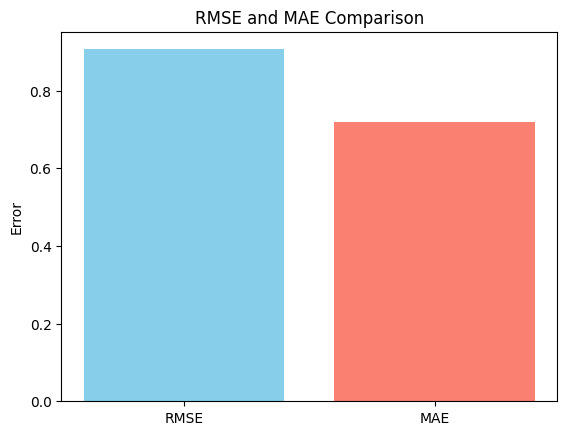

In [60]:
# Train and Test using the noisy KNN with increased noise level
approx_test_matrix_noisy = knn_recommender_noisy(train_matrix, test_matrix, n_neighbors=1, metric='manhattan', noise_level=0.9)

# Evaluate RMSE and MAE
rmse_noisy = compute_rmse(test_matrix, approx_test_matrix_noisy)
mae_noisy = compute_mae(test_matrix, approx_test_matrix_noisy)

# Tampilkan hasil RMSE dan MAE
print(f"RMSE: {rmse_noisy:.4f}")
print(f"MAE: {mae_noisy:.4f}")

# Visualisasi RMSE dan MAE
metrics = ['RMSE', 'MAE']
values = [rmse_noisy, mae_noisy]

plt.bar(metrics, values, color=['skyblue', 'salmon'])
plt.title('RMSE and MAE Comparison')
plt.ylabel('Error')
plt.show()

Precision@5: 0.2178
Recall@5: 0.9514
MAP@5: 0.9618

Precision@10: 0.1101
Recall@10: 0.9594
MAP@10: 0.9609


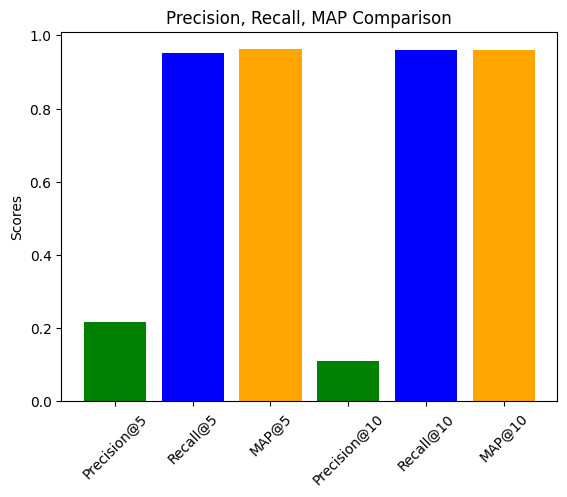

In [61]:
# Evaluate Precision, Recall, MAP for k=5
precision_k5 = precision_at_k(test_matrix, approx_test_matrix_noisy, k=5)
recall_k5 = recall_at_k(test_matrix, approx_test_matrix_noisy, k=5)
mapk_k5 = average_precision_at_k(test_matrix, approx_test_matrix_noisy, k=5)

# Evaluate Precision, Recall, MAP for k=10
precision_k10 = precision_at_k(test_matrix, approx_test_matrix_noisy, k=10)
recall_k10 = recall_at_k(test_matrix, approx_test_matrix_noisy, k=10)
mapk_k10 = average_precision_at_k(test_matrix, approx_test_matrix_noisy, k=10)

# Tampilkan hasil
print(f"Precision@5: {precision_k5:.4f}")
print(f"Recall@5: {recall_k5:.4f}")
print(f"MAP@5: {mapk_k5:.4f}\n")

print(f"Precision@10: {precision_k10:.4f}")
print(f"Recall@10: {recall_k10:.4f}")
print(f"MAP@10: {mapk_k10:.4f}")

# Visualisasi hasil Precision, Recall, MAP
metrics = ['Precision@5', 'Recall@5', 'MAP@5', 'Precision@10', 'Recall@10', 'MAP@10']
values = [precision_k5, recall_k5, mapk_k5, precision_k10, recall_k10, mapk_k10]

plt.bar(metrics, values, color=['green', 'blue', 'orange', 'green', 'blue', 'orange'])
plt.title('Precision, Recall, MAP Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

# Tuning

In [62]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk evaluasi Precision, Recall, MAP pada k
def evaluate_precision_recall_map(true_matrix, approx_matrix, k_values=[5, 10]):
    results = {}

    for k in k_values:
        precision = precision_at_k(true_matrix, approx_matrix, k=k)
        recall = recall_at_k(true_matrix, approx_matrix, k=k)
        mapk = average_precision_at_k(true_matrix, approx_matrix, k=k)

        results[k] = {
            'Precision': precision,
            'Recall': recall,
            'MAP': mapk
        }

    return results

# Fungsi untuk melakukan training dan evaluasi dengan KNN
def knn_recommender(train_matrix, test_matrix, n_neighbors=5, metric='cosine'):
    # Convert matrices to numpy array
    train_data = train_matrix.values
    test_data = test_matrix.values

    # Fit the KNN model
    knn_model = NearestNeighbors(n_neighbors=n_neighbors, metric=metric)
    knn_model.fit(train_data)

    # Predict for each user in the test set
    approx_matrix = np.zeros_like(test_data)
    for user_idx in range(test_data.shape[0]):
        # Find the nearest neighbors for the current user
        distances, neighbors = knn_model.kneighbors([test_data[user_idx]])
        weights = 1 - distances  # Convert distance to similarity (1 - distance)

        # Weighted average of the ratings of the neighbors
        neighbor_ratings = train_data[neighbors.flatten()]
        weighted_ratings = np.dot(weights.flatten(), neighbor_ratings)
        weight_sum = weights.sum()

        # Avoid division by zero
        approx_matrix[user_idx] = weighted_ratings / weight_sum if weight_sum > 0 else 0

    return approx_matrix

In [63]:
# Fungsi untuk evaluasi RMSE dan MAE
def evaluate_performance(true_matrix, approx_matrix):
    rmse = compute_rmse(true_matrix, approx_matrix)
    mae = compute_mae(true_matrix, approx_matrix)
    return rmse, mae

# Mencoba berbagai hyperparameters untuk mencari parameter terbaik dengan GridSearch
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Jumlah tetangga yang digunakan
    'metric': ['cosine', 'euclidean', 'manhattan']  # Metrik kedekatan yang diuji
}

# GridSearch untuk mencari parameter terbaik
knn_model = NearestNeighbors()
grid_search = GridSearchCV(knn_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(train_matrix)

# Menampilkan parameter terbaik
best_params = grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.

Test RMSE: 0.1416
Test MAE: 0.0103


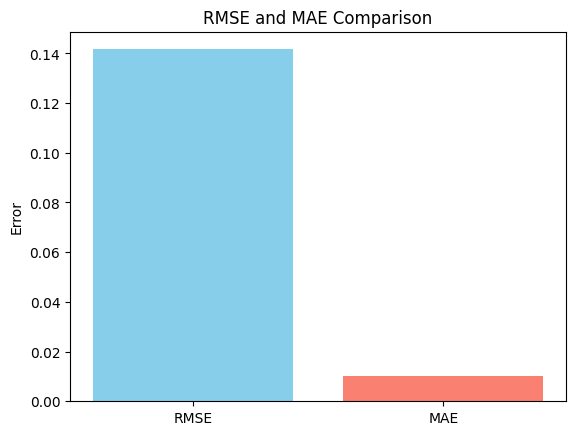

In [64]:
# Melakukan training dengan parameter terbaik
best_knn_model = NearestNeighbors(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])
best_knn_model.fit(train_matrix)

# Prediksi menggunakan model yang sudah dilatih
approx_test_matrix = knn_recommender(train_matrix, test_matrix, n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])

# Evaluasi kinerja pada test set
rmse, mae = evaluate_performance(test_matrix, approx_test_matrix)

# Tampilkan hasil RMSE dan MAE
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")

# Visualisasi RMSE dan MAE
metrics = ['RMSE', 'MAE']
values = [rmse, mae]
plt.bar(metrics, values, color=['skyblue', 'salmon'])
plt.title('RMSE and MAE Comparison')
plt.ylabel('Error')
plt.show()

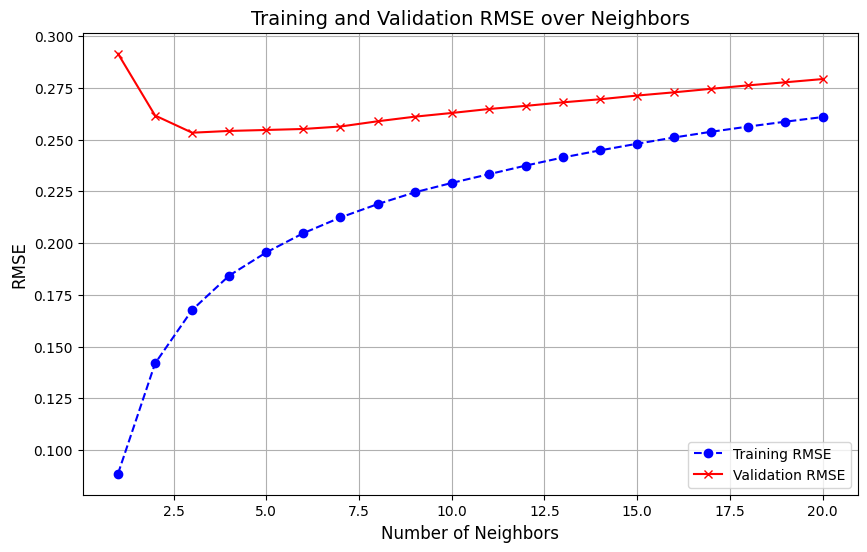

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

def compute_rmse(true_matrix, approx_matrix):
    mask = ~np.isnan(true_matrix)
    mse = ((true_matrix[mask] - approx_matrix[mask]) ** 2).mean()
    return np.sqrt(mse)

def evaluate_knn(train_matrix, val_matrix, n_neighbors, metric='cosine'):
    train_data = train_matrix.values
    val_data = val_matrix.values

    knn_model = NearestNeighbors(n_neighbors=n_neighbors, metric=metric)
    knn_model.fit(train_data)

    approx_train_matrix = np.zeros_like(train_data)
    for user_idx in range(train_data.shape[0]):
        distances, neighbors = knn_model.kneighbors([train_data[user_idx]])
        weights = 1 - distances
        neighbor_ratings = train_data[neighbors.flatten()]
        weighted_ratings = np.dot(weights.flatten(), neighbor_ratings)
        weight_sum = weights.sum()
        approx_train_matrix[user_idx] = weighted_ratings / weight_sum if weight_sum > 0 else 0

    train_rmse = compute_rmse(train_data, approx_train_matrix)

    approx_val_matrix = np.zeros_like(val_data)
    for user_idx in range(val_data.shape[0]):
        distances, neighbors = knn_model.kneighbors([val_data[user_idx]])
        weights = 1 - distances
        neighbor_ratings = train_data[neighbors.flatten()]
        weighted_ratings = np.dot(weights.flatten(), neighbor_ratings)
        weight_sum = weights.sum()
        approx_val_matrix[user_idx] = weighted_ratings / weight_sum if weight_sum > 0 else 0

    val_rmse = compute_rmse(val_data, approx_val_matrix)

    return train_rmse, val_rmse

neighbors_range = range(1, 21)

train_rmse_list = []
val_rmse_list = []

for n_neighbors in neighbors_range:
    train_rmse, val_rmse = evaluate_knn(train_data, val_data, n_neighbors, metric='cosine')
    train_rmse_list.append(train_rmse)
    val_rmse_list.append(val_rmse)

# Plot hasil
plt.figure(figsize=(10, 6))

plt.plot(neighbors_range, train_rmse_list, label='Training RMSE', color='blue', marker='o', linestyle='--')
plt.plot(neighbors_range, val_rmse_list, label='Validation RMSE', color='red', marker='x', linestyle='-')

plt.title('Training and Validation RMSE over Neighbors', fontsize=14)
plt.xlabel('Number of Neighbors', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

# Menambahkan grid
plt.grid(True)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

Results for k=5:
Precision@5: 0.2284
Recall@5: 0.9845
MAP@5: 0.9991

Results for k=10:
Precision@10: 0.1144
Recall@10: 0.9852
MAP@10: 0.9987



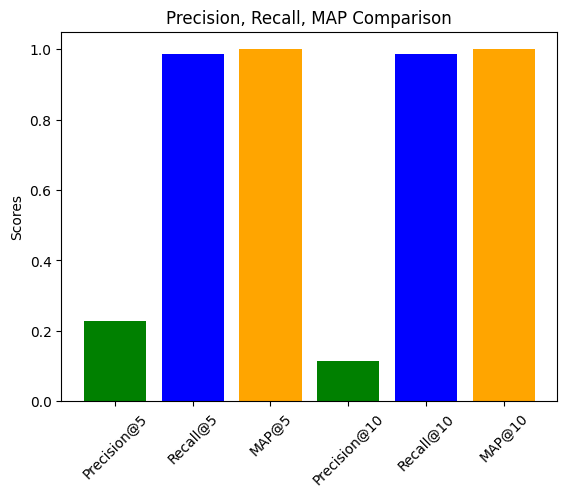

In [65]:
# Evaluasi Precision, Recall, MAP untuk k=5 dan k=10
evaluation_results = evaluate_precision_recall_map(test_matrix, approx_test_matrix, k_values=[5, 10])

# Tampilkan hasil Precision, Recall, MAP
for k in [5, 10]:
    print(f"Results for k={k}:")
    print(f"Precision@{k}: {evaluation_results[k]['Precision']:.4f}")
    print(f"Recall@{k}: {evaluation_results[k]['Recall']:.4f}")
    print(f"MAP@{k}: {evaluation_results[k]['MAP']:.4f}\n")

# Visualisasi hasil Precision, Recall, MAP untuk k=5 dan k=10
metrics = ['Precision@5', 'Recall@5', 'MAP@5', 'Precision@10', 'Recall@10', 'MAP@10']
values = [
    evaluation_results[5]['Precision'], evaluation_results[5]['Recall'], evaluation_results[5]['MAP'],
    evaluation_results[10]['Precision'], evaluation_results[10]['Recall'], evaluation_results[10]['MAP']
]

plt.bar(metrics, values, color=['green', 'blue', 'orange', 'green', 'blue', 'orange'])
plt.title('Precision, Recall, MAP Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

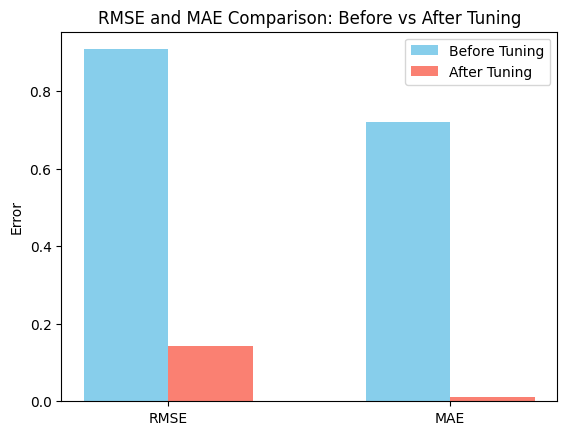

In [66]:
import matplotlib.pyplot as plt

# Sebelum tuning (Noisy KNN dengan noise level tinggi)
rmse_noisy = 0.9076  # Ganti dengan hasil RMSE yang diperoleh sebelum tuning
mae_noisy = 0.7206  # Ganti dengan hasil MAE yang diperoleh sebelum tuning

# Setelah tuning (setelah GridSearchCV atau tuning parameter lainnya)
rmse_tuned = 0.1416  # Ganti dengan hasil RMSE yang diperoleh setelah tuning
mae_tuned = 0.0103  # Ganti dengan hasil MAE yang diperoleh setelah tuning

# Data untuk visualisasi
metrics = ['RMSE', 'MAE']
noisy_values = [rmse_noisy, mae_noisy]
tuned_values = [rmse_tuned, mae_tuned]

# Membuat diagram batang perbandingan RMSE dan MAE
x = range(len(metrics))  # Posisi x untuk bar chart
width = 0.3  # Lebar bar chart

fig, ax = plt.subplots()

# Bar chart sebelum tuning (Noisy)
ax.bar(x, noisy_values, width, label='Before Tuning', color='skyblue')

# Bar chart setelah tuning
ax.bar([p + width for p in x], tuned_values, width, label='After Tuning', color='salmon')

# Menambahkan label dan judul
ax.set_ylabel('Error')
ax.set_title('RMSE and MAE Comparison: Before vs After Tuning')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(metrics)
ax.legend()

# Menampilkan diagram batang
plt.show()

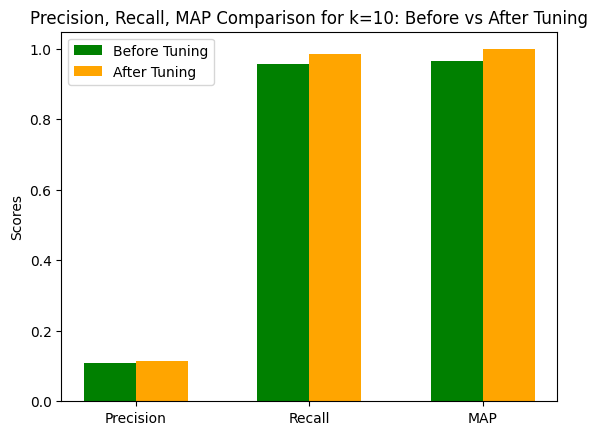

In [67]:
# Sebelum tuning (Noisy KNN dengan noise level tinggi, k=10)
precision_k10_noisy = 0.1097  # Ganti dengan hasil Precision@10 yang diperoleh sebelum tuning
recall_k10_noisy = 0.9582  # Ganti dengan hasil Recall@10 yang diperoleh sebelum tuning
mapk_k10_noisy = 0.9652  # Ganti dengan hasil MAP@10 yang diperoleh sebelum tuning

# Setelah tuning (setelah GridSearchCV atau tuning parameter lainnya, k=10)
precision_k10_tuned = 0.1144  # Ganti dengan hasil Precision@10 yang diperoleh setelah tuning
recall_k10_tuned = 0.9852  # Ganti dengan hasil Recall@10 yang diperoleh setelah tuning
mapk_k10_tuned = 0.9987  # Ganti dengan hasil MAP@10 yang diperoleh setelah tuning

# Data untuk visualisasi
metrics_k10 = ['Precision', 'Recall', 'MAP']
noisy_k10_values = [precision_k10_noisy, recall_k10_noisy, mapk_k10_noisy]
tuned_k10_values = [precision_k10_tuned, recall_k10_tuned, mapk_k10_tuned]

# Membuat diagram batang perbandingan Precision, Recall, MAP pada k=10
x_k10 = range(len(metrics_k10))  # Posisi x untuk bar chart
width = 0.3  # Lebar bar chart

fig, ax = plt.subplots()

# Bar chart sebelum tuning (Noisy)
ax.bar(x_k10, noisy_k10_values, width, label='Before Tuning', color='green')

# Bar chart setelah tuning
ax.bar([p + width for p in x_k10], tuned_k10_values, width, label='After Tuning', color='orange')

# Menambahkan label dan judul
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, MAP Comparison for k=10: Before vs After Tuning')
ax.set_xticks([p + width / 2 for p in x_k10])
ax.set_xticklabels(metrics_k10)
ax.legend()

# Menampilkan diagram batang
plt.show()

# Rekomendasi Pada User

In [68]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def get_recommendations_for_user(train_matrix, user_id, n_neighbors=5, metric='cosine'):
    # Cek apakah user_id ada dalam train_matrix
    if user_id not in train_matrix.index:
        print(f"User {user_id} not found in the training data.")
        return None

    # Convert matriks ke array numpy
    train_data = train_matrix.values

    # Fit model KNN
    knn_model = NearestNeighbors(n_neighbors=n_neighbors, metric=metric)
    knn_model.fit(train_data)

    # Temukan index user_id dalam matriks
    user_idx = train_matrix.index.get_loc(user_id)

    # Cari neighbors terdekat untuk user
    distances, neighbors = knn_model.kneighbors([train_data[user_idx]])

    # Mengambil ratings dari neighbors
    neighbor_ratings = train_data[neighbors.flatten()]

    # Rata-rata ratings dari neighbors
    avg_ratings = neighbor_ratings.mean(axis=0)

    # Ambil item dengan rating tertinggi
    recommended_items = np.argsort(avg_ratings)[::-1]  # Item dengan rating tertinggi pertama

    return recommended_items[:5]  # Rekomendasi 10 item teratas

# Gunakan fungsi di atas untuk memberikan rekomendasi kepada user dengan ID tertentu
user_id = 1.047430e+20  # User ID yang diberikan
recommended_items = get_recommendations_for_user(train_matrix, user_id, n_neighbors=5, metric='cosine')

# Tampilkan rekomendasi
if recommended_items is not None:
    print(f"Top 10 recommended items for user {user_id}:")
    # Get the actual place names using recommended_items indices
    recommended_places = train_matrix.columns[recommended_items]
    for idx, place in enumerate(recommended_places, 1):
        print(f"{idx}. {place}")

Top 10 recommended items for user 1.04743e+20:
1. Pantai Lumban Bul-bul Balige
2. Sapo Juma
3. PASIR PUTIH LUMBAN BULBUL
4. Wisata Rumah Pohon
5. Hatulian Beach


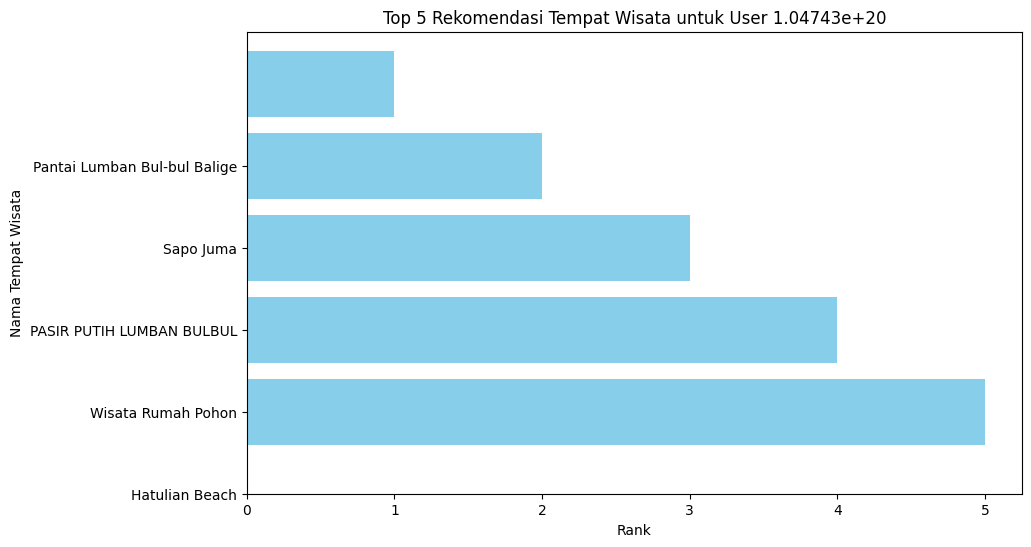

In [73]:
import matplotlib.pyplot as plt

# Ambil 5 rekomendasi teratas
top_5_places = recommended_places[:5]

# Buat data untuk diagram batang
place_ids = [f"Place {idx+1}" for idx in range(len(top_5_places))]
place_names = top_5_places

# Plot diagram batang
plt.figure(figsize=(10, 6))
plt.barh(place_ids, range(1, len(top_5_places) + 1), color='skyblue')

# Menambahkan label
plt.xlabel("Rank")
plt.ylabel("Nama Tempat Wisata")
plt.title(f"Top 5 Rekomendasi Tempat Wisata untuk User {user_id}")
plt.yticks(range(1, len(top_5_places) + 1), place_names)
plt.gca().invert_yaxis()  # Balik sumbu Y agar ranking teratas di atas
plt.show()

In [69]:
def get_all_user_recommendations(train_matrix, k=10):
    avg_ratings = np.mean(train_matrix, axis=0) # Calculate average ratings directly
    recommended_places = train_matrix.columns[np.argsort(avg_ratings)[::-1][:k]]
    return recommended_places[:k]

recommended_places_all = get_all_user_recommendations(train_matrix, k=10)

In [70]:
print("\nRekomendasi tempat wisata berdasarkan rating semua pengguna:")
for idx, place in enumerate(recommended_places_all, 1):
    print(f"{idx}. {place}")


Rekomendasi tempat wisata berdasarkan rating semua pengguna:
1. Pantai Lumban Bul-bul Balige
2. The Kaldera
3. Bukit Holbung Samosir
4. Pantai Bebas Parapat, Danau Toba
5. Danau Toba Parapat
6. Pertunjukan Tari Sigale Gale
7. Air Terjun Efrata
8. Museum Batak Tb Silalahi Center
9. Menara Pandang Tele
10. Bukit Indah Simarjarunjung


In [71]:
def get_all_user_recommendations(train_matrix, k=10):
    avg_ratings = np.mean(train_matrix, axis=0) # Calculate average ratings directly
    recommended_places = train_matrix.columns[np.argsort(avg_ratings)[::-1][:k]]
    return recommended_places[:k]

recommended_places_all = get_all_user_recommendations(train_matrix, k=5)

In [72]:
print("\nRekomendasi tempat wisata berdasarkan rating semua pengguna:")
for idx, place in enumerate(recommended_places_all, 1):
    print(f"{idx}. {place}")


Rekomendasi tempat wisata berdasarkan rating semua pengguna:
1. Pantai Lumban Bul-bul Balige
2. The Kaldera
3. Bukit Holbung Samosir
4. Pantai Bebas Parapat, Danau Toba
5. Danau Toba Parapat
